# Network Effects of Death on Societal Well-Being

In this notebook, we will explore the affects of death of person on his/her immediate social peers. The goal is not the analysis of such cases but to come up with systems and equations to show how the death of a person affects the well-being of his/her social peers.

In [85]:
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt

# align graph outputs to the center
from IPython.display import display, HTML


For starters, let's assume a simple social network of 10 people. We will use the following notation:

* $x$ is the person who died.
* $y$ is the person who is affected by the death of $x$.


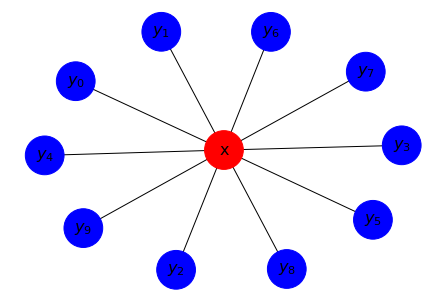

In [31]:
color_map = []

peers = [f"$y_{i}$" for i in range(10)]


G = nx.Graph()


G.add_node('x')
G.add_nodes_from(peers)
G.add_edges_from([('x', peer) for peer in peers])

for node in G:
    if node == 'x':
        color_map.append('red')
    else:
        color_map.append('blue')

nx.draw(G, with_labels=True, node_color=color_map, node_size=1500, font_size=16)


Here is the social network of 10 people. But this only represents the immediate social peers of $x$, $y_s$. Every person in the network has a social network of his/her own. We need to take this into account. To add them, we can change our notation to $y_i^z$, where $z$ is the social network of $y_i$. We can say that $y_i$ is $z$ number of hops or degrees away from $x$. $z$ is important as it will help us determine the effect of the death of $x$ on the a larger scale.

Let's add 5 peers to each person in the network. This will give us a total of 50 people in the network.

$y_{1,2,3}^4$

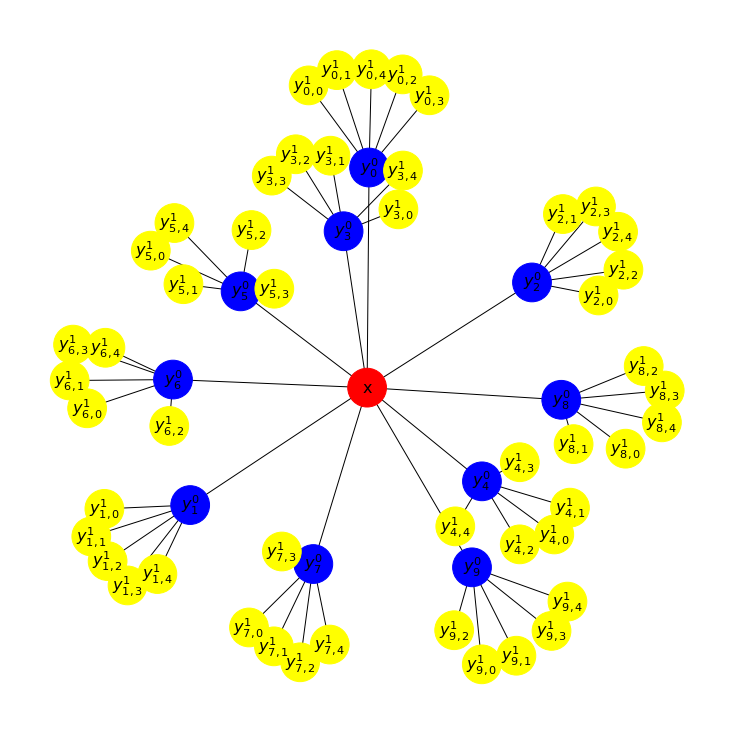

In [138]:
color_map = []

peers = [f"$y_{i}^0$" for i in range(10)]


G = nx.Graph()


G.add_node('x')
G.add_nodes_from(peers)
G.add_edges_from([('x', peer) for peer in peers])


# add 5 nodes to the Ys 
for idx, peer in enumerate(peers):
    G.add_nodes_from(["$y_{"+f"{idx},{i}"+"}^1$" for i in range(5)])
    G.add_edges_from([(peer, "$y_{"+f"{idx},{i}"+"}^1$") for i in range(5)])

# G.add_node('$y_0^1$')
# G.add_edges_from([('$y_1^0$', '$y_0^1$')])

for node in G:
    if node == 'x':
        color_map.append('red')
    elif node.endswith('^0$'):
        color_map.append('blue')
    elif node.endswith('^1$'):
        color_map.append('yellow')

# put nodes in concentric circles, spring layout
pos = nx.spring_layout(G, k=0.5, iterations=50)


# shells = [[x for x in G.nodes() if x == 'x'], [x for x in G.nodes() if x.endswith('^0$')], [x for x in G.nodes() if x.endswith('^1$')]]
# pos = nx.shell_layout(G, nlist=shells)
# pos['x'] = np.array([0, 0])


nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=1500, font_size=16)
# make the graph bigger
plt.rcParams["figure.figsize"] = (10,10)

# nx.draw(G, with_labels=True, node_color=color_map, node_size=1200, font_size=16)

We can keep on adding more and more people to the network. But this will make the network too complex to analyze. So, we will keep it simple for now.